## AFL 2 : Coronavirus

Import the necessary libraries

In [79]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

Load dataset

In [80]:
url = "https://raw.githubusercontent.com/Zwelious/AFL2DM_Alfred_Benito/refs/heads/main/COVID-19%20Coronavirus.csv"
df = pd.read_csv(url)
df.head()

# Loads dataset and shows the first five rows of the dataset

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [81]:
df.describe()
# Describing data to see the numerical attributes for each numerical columns, starting from count, mean, standard deviation, and each quartile.

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [82]:
df.info()
# Check for dataset info
# Shows datatype of each columns, with non-null count of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [83]:
df.rename(columns={'Tot Cases//1M pop': 'Total Cases/1M pop', 'Tot Deaths/1M pop': 'Total Deaths/1M pop'}, inplace=True)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


Exploratory Data Analysis


Data Visualization 1

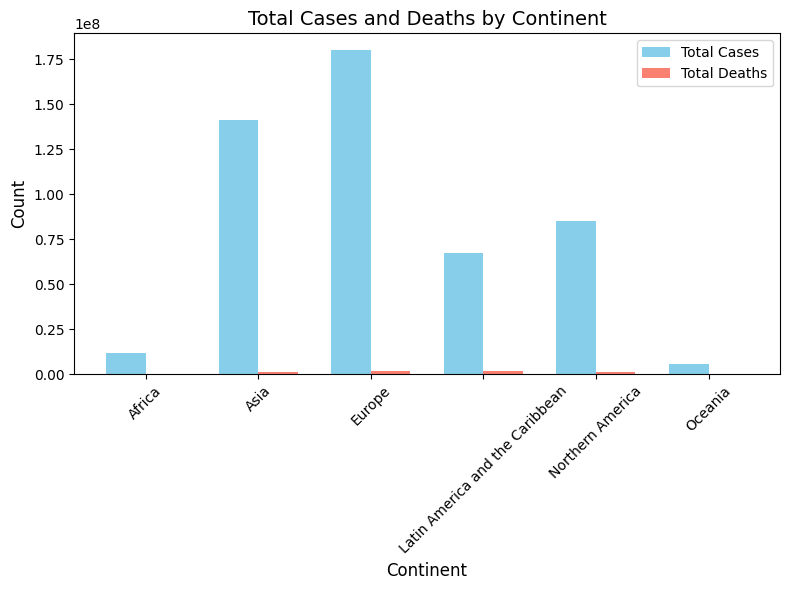

In [84]:
# Visualization 1: Total Cases and Total Deaths by Country
continent_data = df.groupby('Continent').sum()

# Adding Death Percentage column to aggregated data
continent_data['Death Percentage'] = (continent_data['Total Deaths'] / continent_data['Total Cases']) * 100

# Visualization: Bar plot of Total Cases and Total Deaths by Continent
plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(continent_data.index))

plt.bar(x, continent_data['Total Cases'], width=bar_width, label='Total Cases', color='skyblue')
plt.bar([i + bar_width for i in x], continent_data['Total Deaths'], width=bar_width, label='Total Deaths', color='salmon')

plt.xlabel('Continent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Total Cases and Deaths by Continent', fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], continent_data.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-85-bb5d36bd0227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Continent', y='Death percentage', data=df, palette='pastel')


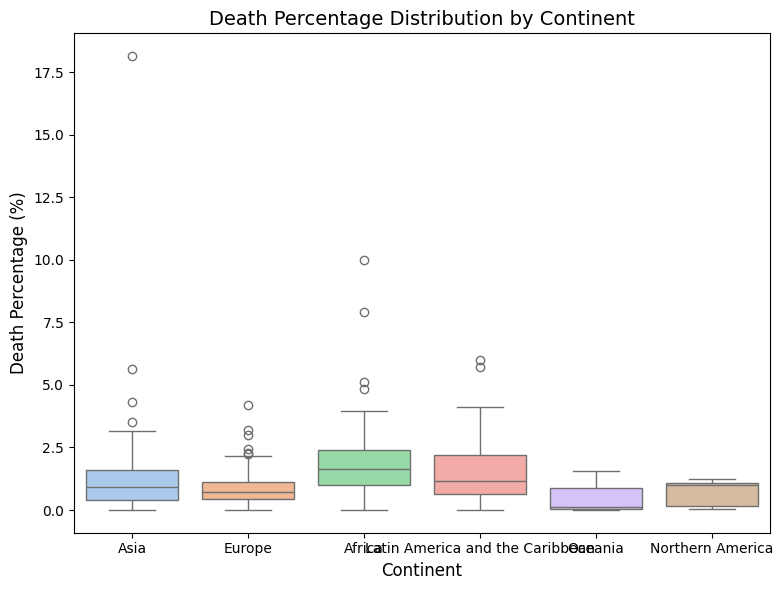

In [85]:
# Visualization 2: Death Percentage by Continent

plt.figure(figsize=(8, 6))
sns.boxplot(x='Continent', y='Death percentage', data=df, palette='pastel')

plt.xlabel('Continent', fontsize=12)
plt.ylabel('Death Percentage (%)', fontsize=12)
plt.title('Death Percentage Distribution by Continent', fontsize=14)
plt.tight_layout()
plt.show()

Data Preparation

1. Data Cleaning
2. Data Transformation

```
# This is formatted as code
```



1. Data Cleaning

In [86]:
# 1. Checking missing values

df.isnull().sum()
# The table below shows the number of null values in each columns.

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Total Cases/1M pop,0
Total Deaths/1M pop,0
Death percentage,0


In [87]:
# Dropping unnecessary columns
df = df.drop('Country', axis=1)
df = df.drop('Other names', axis=1)
df = df.drop('ISO 3166-1 alpha-3 CODE', axis=1)

# Since, country, other names, and country code is not an important column, we can just drop the whole column.

df.isnull().sum()

,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Total Cases/1M pop,0
Total Deaths/1M pop,0
Death percentage,0


2. Data Transformation

In [88]:
# Data Encoding
label_encoder = LabelEncoder()

df['Continent'] = label_encoder.fit_transform(df['Continent'])

df.head()

# Encodes each categorical columns, so that it becomes numerical and ready to be used at the next phases.
# Some are mapped instead of encoded using label encoder, to make sure the result matches.

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438


check the data type

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           225 non-null    int64  
 1   Continent            225 non-null    int64  
 2   Total Cases          225 non-null    int64  
 3   Total Deaths         225 non-null    int64  
 4   Total Cases/1M pop   225 non-null    int64  
 5   Total Deaths/1M pop  225 non-null    int64  
 6   Death percentage     225 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 12.4 KB


Change the data types from:

- float to int
- object to int

4.

In [90]:
# Data Scaling
sc = StandardScaler()

df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

df_scaled.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

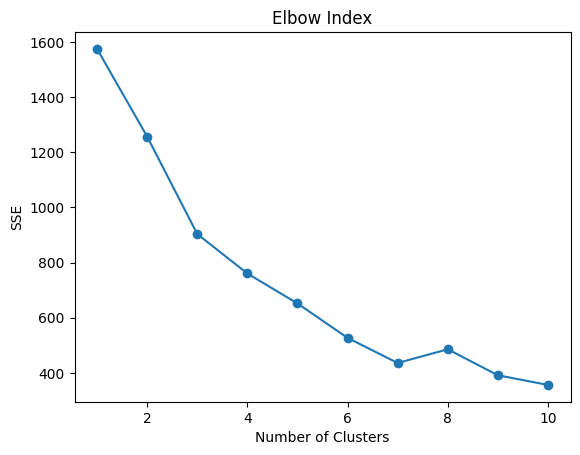

In [91]:
# K-Means Clustering
sse=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Index")
plt.show()

# Using the elbow method to help determine how many clusters are optimal
# This is to identify the point where the SSE starts to decrease more slowly.
# This is considered the optimal number of clusters, as adding more clusters beyond this point doesn't significantly improve the fit but increases complexity.

In [92]:
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is", best_k)

# The algorithm to search how many clusters are best, helping the statement I stated above.

the best k for your model is 4


Train the K-Means model on the dataset with the number of clusters you have determined.

In [93]:
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)

# Training KMeans model for the clustering using the n cluster as 3
# This is to cluster the data into several different clusters or groups

In [94]:
# Inverse transform the scaled data to get the original values
df_inversed = pd.DataFrame(sc.inverse_transform(df_scaled), columns=df_scaled.columns)

df_inversed['KMeans'] = y_pred

df_inversed.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage,KMeans
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.313743,0
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.275058,3
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.587216,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.382271,1
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.915438,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [95]:
# aggregation
cluster_summary = df_inversed.groupby(y_pred).agg({
    'Population': ['mean', 'min', 'max'],
    'Continent': [pd.Series.mode],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Total Cases/1M pop': ['mean', 'min', 'max'],
    'Total Deaths/1M pop': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis("KMeans")

cluster_summary_transposed = cluster_summary.T

new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

cluster_summary_transposed

# This is to create the details of each columns for each cluster
# This could be used to determine the meaning for each clusters, to conclude, and then to predict new data (belongs to which cluster)

KMeans                          Cluster 0        Cluster 1         Cluster 2  \
Population          mean  48236018.870968  16728442.816901  651119826.333333   
                    min            6109.0           9930.0       215204501.0   
                    max      1439323776.0      146044010.0      1403754381.0   
Continent           mode              0.0              2.0   [1.0, 3.0, 4.0]   
Total Cases         mean    757415.043011   3452822.760563   51622637.333333   
                    min               2.0           4150.0        29999816.0   
                    max         9818328.0       25997852.0        81839052.0   
Total Deaths        mean     10291.107527     39560.169014     729959.666667   
                    min               0.0              6.0          521388.0   
                    max          155288.0         369708.0         1008222.0   
Total Cases/1M pop  mean     31716.924731    300627.760563     138262.666667   
                    min              16.0          43147.0           30653.0   
                    max          187113.0         696044.0          244734.0   
Total Deaths/1M pop mean       330.021505      2246.056338       2151.333333   
                    min               0.0            293.0             371.0   
                    max            2353.0           6286.0            3068.0   
Death percentage    mean         1.970174          1.06769          1.548193   
                    min               0.0         0.055546          1.211712   
                    max         18.151787         5.983499           2.20091   

KMeans                         Cluster 3  
Population          mean  4559362.051724  
                    min            805.0  
                    max       38321435.0  
Continent           mode             3.0  
Total Cases         mean   364101.724138  
                    min              1.0  
                    max        4680816.0  
Total Deaths        mean     3794.913793  
                    min              0.0  
                    max          37690.0  
Total Cases/1M pop  mean   105061.224138  
                    min              9.0  
                    max         340703.0  
Total Deaths/1M pop mean      864.568966  
                    min              0.0  
                    max           2669.0  
Death percentage    mean        1.056058  
                    min              0.0  
                    max         4.119248

In [96]:
# count data from each cluster
df_inversed['KMeans'].value_counts().sort_index()

# To see the distribution of clusters

,count
KMeans,
0,93
1,71
2,3
3,58


In [97]:
# write down your interpretation from the cluster that you have been made
# Cluster 0 represents moderate-sized properties (a medium sized, but still more than 2 rooms) at mid-range prices, targeting to middle-class buyers who maybe have bigger families.
# Cluster 1 represents bigger and probably more luxurious properties (shown by a high area and more rooms), targeting high-income buyers or investors.
# Cluster 2 represents smaller, affordable properties (small-sized, even some only 1 floor), likely targeting first-time homebuyers, or a simple family with a small amount of family members.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

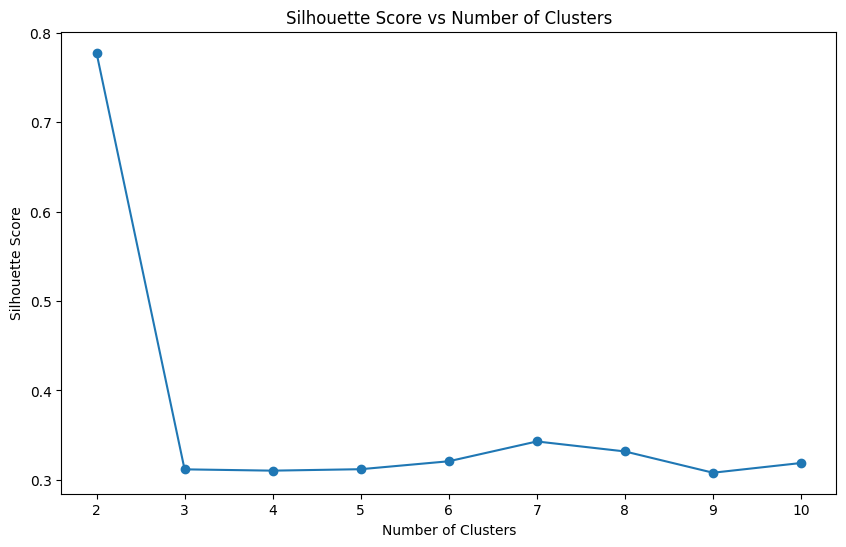

The best number of clusters is: 2


In [98]:
# The image below is not the final result, if yours looks different, that’s okay.

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_k}")

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [99]:
# agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = agglo.fit_predict(df_scaled)

In [100]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df_inversed = pd.DataFrame(sc.inverse_transform(df_scaled), columns=df_scaled.columns)

df_inversed['Agglo'] = y_pred

# show the df
df_inversed.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M pop,Total Deaths/1M pop,Death percentage,Agglo
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.313743,0
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.275058,0
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.587216,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.382271,0
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.915438,0




```
# This is formatted as code
```

Display the cluster summary in the form of a dataframe.

In [101]:
cluster_summary = df_inversed.groupby(y_pred).agg({
    'Population': ['mean', 'min', 'max'],
    'Continent': [pd.Series.mode],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Total Cases/1M pop': ['mean', 'min', 'max'],
    'Total Deaths/1M pop': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max']
})
cluster_summary = cluster_summary.rename_axis("Agglo")
cluster_summary.T

Agglo                                0             1
Population          mean  2.123420e+07  1.059160e+09
                    min   8.050000e+02  3.344006e+08
                    max   2.785865e+08  1.439324e+09
Continent           mode  2.220446e-16  1.000000e+00
Total Cases         mean  1.651140e+06  4.167428e+07
                    min   1.000000e+00  1.547380e+05
                    max   2.999982e+07  8.183905e+07
Total Deaths        mean  2.090802e+04  5.114160e+05
                    min   0.000000e+00  4.638000e+03
                    max   6.602690e+05  1.008222e+06
Total Cases/1M pop  mean  1.375094e+05  9.183167e+04
                    min   9.000000e+00  1.080000e+02
                    max   6.960440e+05  2.447340e+05
Total Deaths/1M pop mean  1.096270e+03  1.129667e+03
                    min   0.000000e+00  3.000000e+00
                    max   6.286000e+03  3.015000e+03
Death percentage    mean  1.439131e+00  1.813664e+00
                    min   0.000000e+00  1.211712e+00
                    max   1.815179e+01  2.997325e+00

In [102]:
df_inversed['Agglo'].value_counts().sort_index()

,count
Agglo,
0,222
1,3


In [103]:
# write down your interpretation from the cluster that you have been made
# While KMeans have 3 clusters, using Agglo only gives 2 clusters
# Agglo 0 features properties with consistently higher prices, large areas, taller (up to 4 floors), suitable for high-end buyers.
# Agglo 1 features on-budget properties, with 1-2 floors, smaller sizes, and less rooms.

**Hierarchical Visualization**

Single Linkage

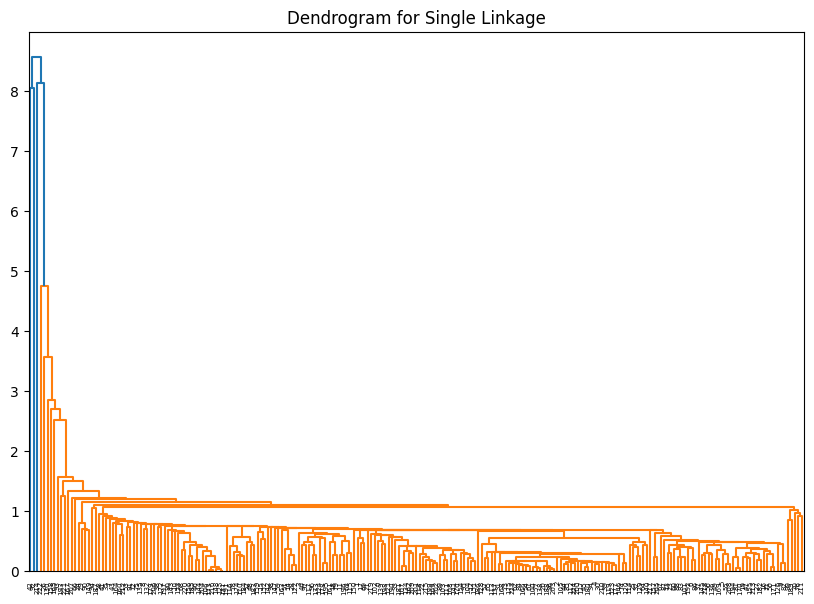

In [104]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.show()

complete linkage

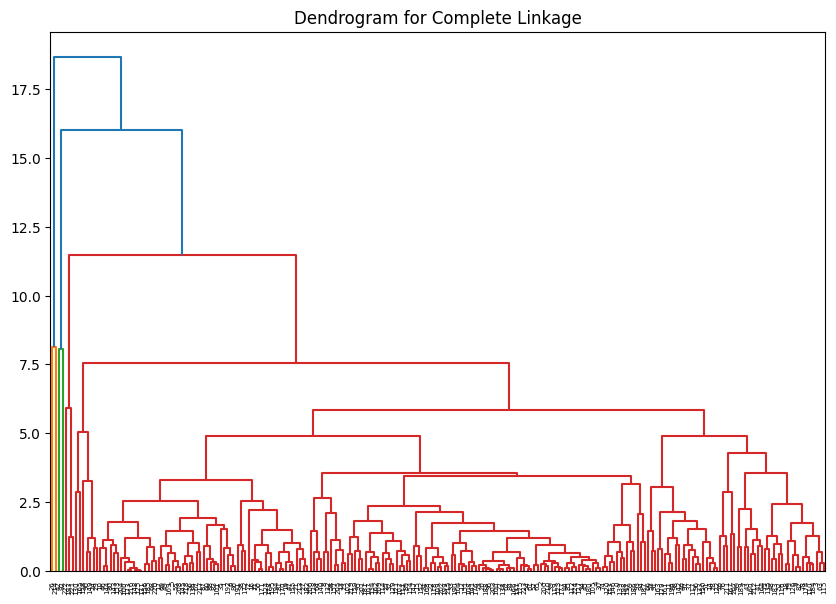

In [105]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.show()

average linkage

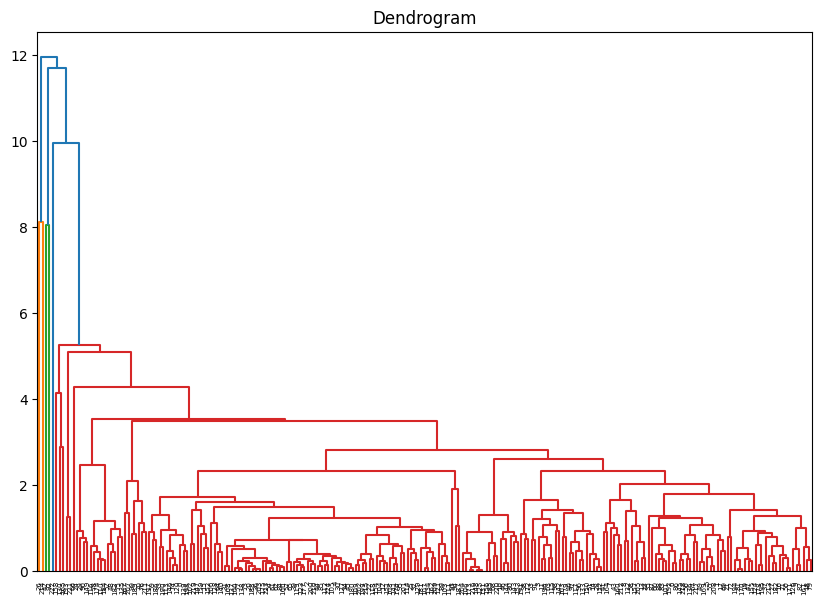

In [106]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.show()

ward method

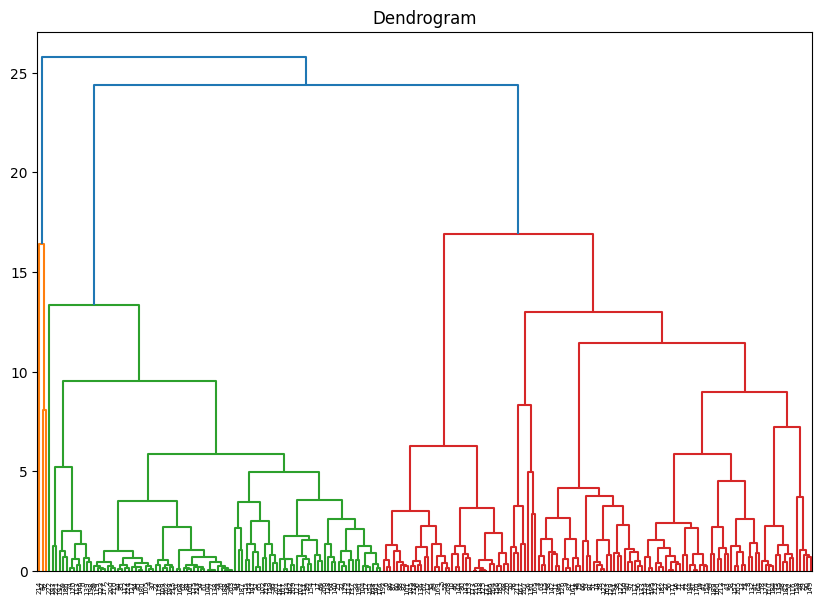

In [107]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show()